In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/9d/53/346be660c6e32584099923ca5d3307ccac21bf0b753e9a22f67ecc92d859/mysql_connector_python-8.2.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached mysql_connector_python-8.2.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached protobuf-4.21.12-cp37-abi3-macosx_10_9_universal2.whl (486 kB)
Using cached mysql_connector_python-8.2.0-cp311-cp311-macosx_12_0_arm64.whl (14.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='Player_database',
                                         user='root',
                                         password='Sparsh1223')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.34
You're connected to database:  ('player_database',)


In [129]:
sql_query = """
select * from players
"""

player_df = pd.read_sql_query(sql_query, connection)

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/2018406815.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  player_df = pd.read_sql_query(sql_query, connection)


In [130]:
player_df

,Player_ID,Player_name,Age,Stance,Batting_order,Wicketkeeper,Bowler_Type,Auction_ID,Team_Name
0,1001,MS Dhoni,42,Right,Middle,Yes,NA,3001,Chennai Super Kings
1,1002,Devon Conway,32,Left,Opener,Yes,NA,3002,Chennai Super Kings
2,1003,Ruturaj Gaikwad,26,Right,Opener,No,NA,3003,Chennai Super Kings
3,1004,Ambati Rayudu,38,Right,Middle,Yes,NA,3004,Chennai Super Kings
4,1005,Subhranshu Senapati,26,Right,Middle,No,NA,3005,Chennai Super Kings
...,...,...,...,...,...,...,...,...,...
230,1231,Upendra Singh Yadav,27,Right,Middle,Yes,NA,3231,Sunrisers Hyderabad
231,1232,Mayank Dagar,27,Right,Lower,No,Spinner,3232,Sunrisers Hyderabad
232,1233,Nitish Kumar Reddy,20,Right,Middle,No,Faster,3233,Sunrisers Hyderabad
233,1234,Akeal Hosein,30,Left,Lower,No,Spinner,3234,Sunrisers Hyderabad


In [131]:
def alphanum(value):

    return ''.join(char for char in value if char.isalnum() or char.isspace())

player_df['alphanum'] = [alphanum(x) for x in player_df['Player_name']]

player_df.drop(columns=['Player_name'], inplace=True)

In [132]:
player_df

,Player_ID,Age,Stance,Batting_order,Wicketkeeper,Bowler_Type,Auction_ID,Team_Name,alphanum
0,1001,42,Right,Middle,Yes,NA,3001,Chennai Super Kings,MS Dhoni
1,1002,32,Left,Opener,Yes,NA,3002,Chennai Super Kings,Devon Conway
2,1003,26,Right,Opener,No,NA,3003,Chennai Super Kings,Ruturaj Gaikwad
3,1004,38,Right,Middle,Yes,NA,3004,Chennai Super Kings,Ambati Rayudu
4,1005,26,Right,Middle,No,NA,3005,Chennai Super Kings,Subhranshu Senapati
...,...,...,...,...,...,...,...,...,...
230,1231,27,Right,Middle,Yes,NA,3231,Sunrisers Hyderabad,Upendra Singh Yadav
231,1232,27,Right,Lower,No,Spinner,3232,Sunrisers Hyderabad,Mayank Dagar
232,1233,20,Right,Middle,No,Faster,3233,Sunrisers Hyderabad,Nitish Kumar Reddy
233,1234,30,Left,Lower,No,Spinner,3234,Sunrisers Hyderabad,Akeal Hosein


In [133]:
player_df.rename(columns = {'alphanum':'Player_Name'}, inplace = True)
player_df

,Player_ID,Age,Stance,Batting_order,Wicketkeeper,Bowler_Type,Auction_ID,Team_Name,Player_Name
0,1001,42,Right,Middle,Yes,NA,3001,Chennai Super Kings,MS Dhoni
1,1002,32,Left,Opener,Yes,NA,3002,Chennai Super Kings,Devon Conway
2,1003,26,Right,Opener,No,NA,3003,Chennai Super Kings,Ruturaj Gaikwad
3,1004,38,Right,Middle,Yes,NA,3004,Chennai Super Kings,Ambati Rayudu
4,1005,26,Right,Middle,No,NA,3005,Chennai Super Kings,Subhranshu Senapati
...,...,...,...,...,...,...,...,...,...
230,1231,27,Right,Middle,Yes,NA,3231,Sunrisers Hyderabad,Upendra Singh Yadav
231,1232,27,Right,Lower,No,Spinner,3232,Sunrisers Hyderabad,Mayank Dagar
232,1233,20,Right,Middle,No,Faster,3233,Sunrisers Hyderabad,Nitish Kumar Reddy
233,1234,30,Left,Lower,No,Spinner,3234,Sunrisers Hyderabad,Akeal Hosein


In [134]:
sql2 = """
select * from performances
"""

performances_df = pd.read_sql_query(sql2, connection)
performances_df

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/4179352485.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  performances_df = pd.read_sql_query(sql2, connection)


,Performance_ID,Run_Scored,Balls_Faced,No_of_boundaries,MOM,Wickets_taken,Player_ID,Match_Num
0,10001,1,6,0,No,0,1002,1
1,10002,92,50,13,No,0,1003,1
2,10003,23,17,5,No,0,1006,1
3,10004,7,6,1,No,0,1020,1
4,10005,12,12,1,No,0,1004,1
...,...,...,...,...,...,...,...,...
1232,11241,53,35,9,No,0,1059,70
1233,11243,6,7,1,No,0,1052,70
1234,11244,4,5,0,No,0,1058,70
1235,11245,0,0,0,No,2,1191,70


In [13]:
sql1 = """
select a.Player_ID,a.Player_Name, 
sum(b.Run_Scored) as Total_runs,
xsum(b.Balls_Faced) as Total_balls_faced,sum(b.Run_Scored)/count(b.Match_Num) as Batting_avg 
from Player_database.performances b 
left join Player_database.players a
on b.Player_ID = a.Player_ID
group by 1,2
having count(match_num) >= 7
order by 5 desc
;"""

result_df1 = pd.read_sql_query(sql1, connection)

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_32947/1347828566.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df1 = pd.read_sql_query(sql1, connection)


In [9]:
result_df1

,Player_ID,Player_Name,Total_runs,Total_balls_faced,Batting_avg
0,1192,Faf Du Plessis,730.0,475.0,52.1429
1,1051,Shubman Gill,680.0,446.0,48.5714
2,1189,Virat Kohli,639.0,457.0,45.6429
3,1167,Yashasvi Jaiswal,625.0,382.0,44.6429
4,1003,Ruturaj Gaikwad,546.0,367.0,42.0000
...,...,...,...,...,...
82,1191,Mohammad Siraj,1.0,2.0,0.0769
83,1012,Tushar Deshpande,0.0,6.0,0.0000
84,1060,Mohammed Shami,0.0,3.0,0.0000
85,1176,Navdeep Saini,0.0,0.0,0.0000


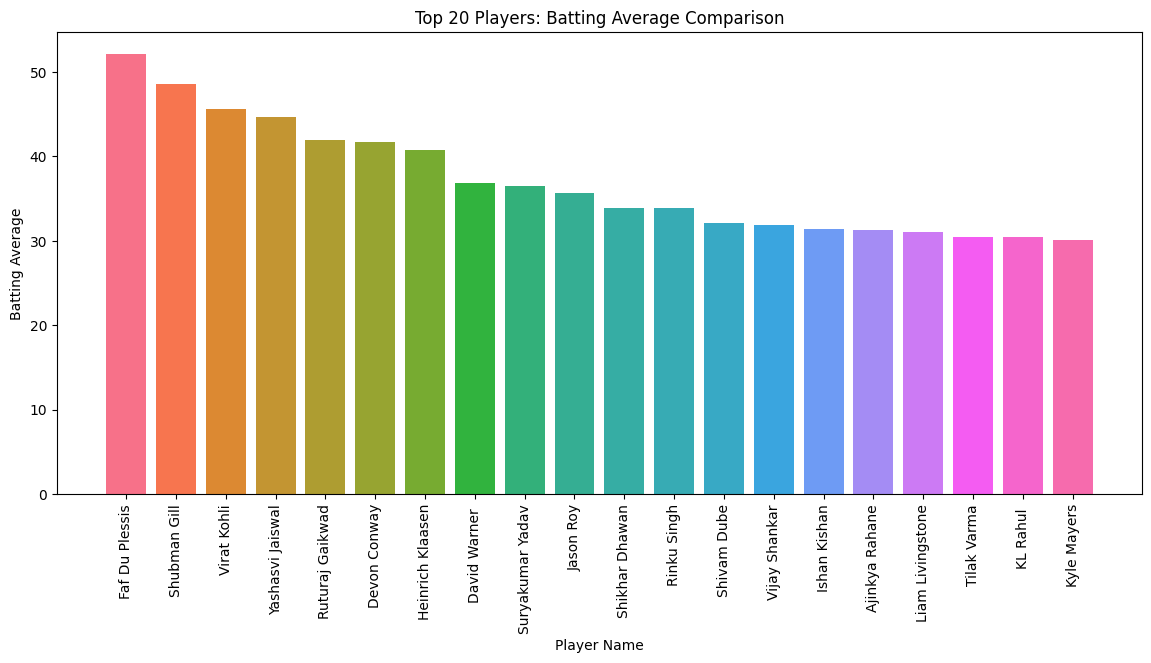

In [138]:
df_sorted1 = result_df1.sort_values(by='Batting_avg', ascending=False).head(20)

colors = sns.color_palette("husl", n_colors=len(df_sorted))

plt.figure(figsize=(14, 6))
plt.bar(df_sorted1['Player_Name'], df_sorted1['Batting_avg'], color=colors)
plt.xlabel('Player Name')
plt.ylabel('Batting Average')
plt.title('Top 20 Players: Batting Average Comparison')
plt.xticks(rotation=90)
plt.show()

In [16]:
sql2 = """
select a.Player_ID,a.Player_Name,a.Batting_order,sum(b.Run_Scored)/count(b.Match_Num) as Batting_avg, 
(sum(b.Run_Scored)/sum(b.Balls_Faced))*100 as strike_rate
from Player_database.performances b 
left join Player_database.players a
on b.Player_ID = a.Player_ID
group by 1,2
having count(match_num) >= 7 and strike_rate >= 110 and Batting_avg >= 22
order by 5 desc
limit 20
;"""

result_df2 = pd.read_sql_query(sql2, connection)
result_df2

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_32947/669109503.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df2 = pd.read_sql_query(sql2, connection)


,Player_ID,Player_Name,Batting_order,Batting_avg,strike_rate
0,1122,Suryakumar Yadav,Middle,36.5000,185.1449
1,1190,Glenn Maxwell,Middle,28.5714,183.4862
2,1226,Heinrich Klaasen,Middle,40.7273,177.0751
3,1093,Jason Roy,Opener,35.6250,174.8466
4,1110,Nicholas Pooran,Middle,25.5714,171.2919
5,1019,Ajinkya Rahane,Middle,31.3333,169.8795
6,1045,Phil Salt,Middle,24.2222,163.9098
7,1167,Yashasvi Jaiswal,Opener,44.6429,163.6126
8,1153,Liam Livingstone,Middle,31.0000,163.1579
9,1059,Vijay Shankar,Middle,31.8889,161.2360


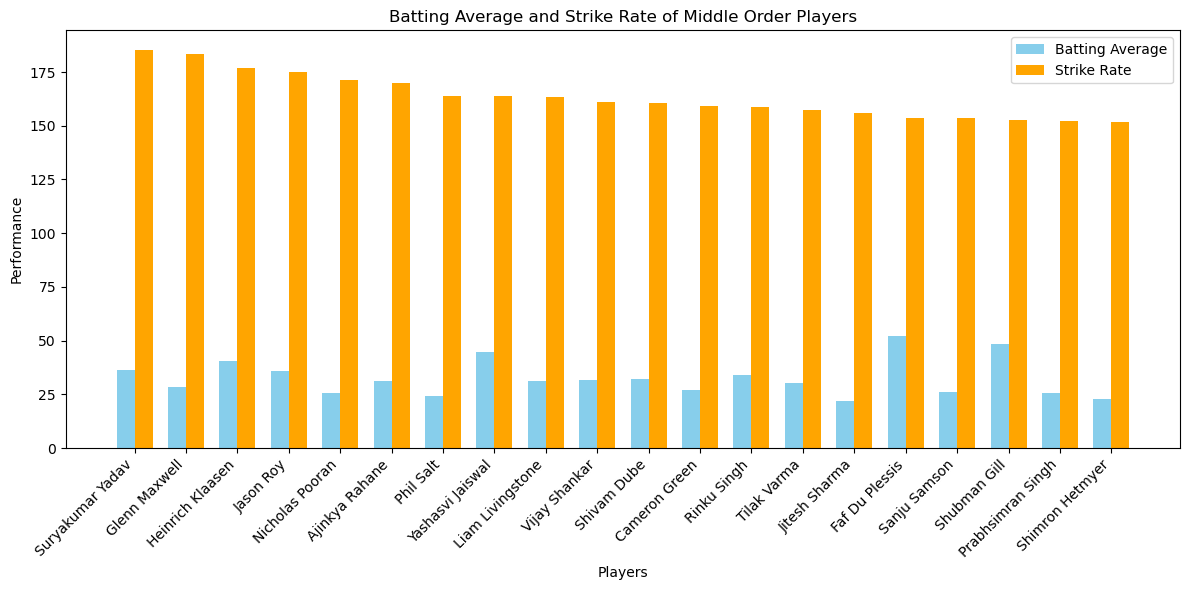

In [8]:
player_indices = np.arange(len(result_df2))

bar_width = 0.35

plt.figure(figsize=(12, 6))

bar1 = plt.bar(player_indices, result_df2['Batting_avg'], bar_width, label='Batting Average', color='skyblue')
bar2 = plt.bar(player_indices + bar_width, result_df2['strike_rate'], bar_width, label='Strike Rate', color='orange')

plt.xlabel('Players')
plt.ylabel('Performance')
plt.title('Batting Average and Strike Rate of Middle Order Players')
plt.xticks(player_indices + bar_width / 2, result_df2['Player_Name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [145]:
sql3 = """
select a.Player_ID,a.Player_Name, 
(sum(b.Run_Scored)/sum(b.Balls_Faced))*100 as strike_rate
from Player_database.performances b 
left join Player_database.players a
on b.Player_ID = a.Player_ID
group by 1,2
having count(match_num) >= 7
order by 3 desc
;"""

result_df3 = pd.read_sql_query(sql3, connection)
result_df3

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/592641619.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df3 = pd.read_sql_query(sql3, connection)


,Player_ID,Player_Name,strike_rate
0,1057,Rashid Khan,237.5000
1,1001,MS Dhoni,190.7407
2,1122,Suryakumar Yadav,185.1449
3,1190,Glenn Maxwell,183.4862
4,1226,Heinrich Klaasen,177.0751
...,...,...,...
82,1081,Varun Chakravarthy,9.0909
83,1060,Mohammed Shami,0.0000
84,1012,Tushar Deshpande,0.0000
85,1176,Navdeep Saini,NaN


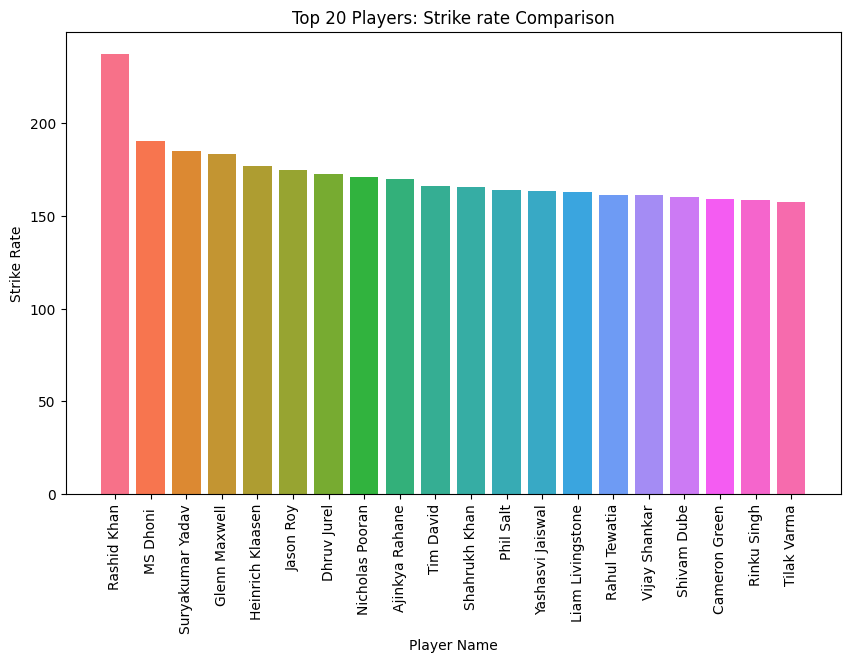

In [146]:
df_sorted3 = result_df3.sort_values(by='strike_rate',ascending=False).head(20)

colors = sns.color_palette("husl", n_colors=len(df_sorted))

plt.figure(figsize=(10, 6))
plt.bar(df_sorted3['Player_Name'], df_sorted3['strike_rate'], color=colors)
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.title('Top 20 Players: Strike rate Comparison')
plt.xticks(rotation=90)
plt.show()

In [147]:
sql4 = """
select a.Player_ID,a.Player_Name, 
sum(b.Wickets_Taken)/count(b.Match_Num) as Average_wicket_taken
from Player_database.performances b 
left join Player_database.players a
on b.Player_ID = a.Player_ID
group by 1,2
having count(match_num) >= 7
order by 3 desc
;"""

result_df4 = pd.read_sql_query(sql4, connection)
result_df4

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/1589872582.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df4 = pd.read_sql_query(sql4, connection)


,Player_ID,Player_Name,Average_wicket_taken
0,1081,Varun Chakravarthy,1.7500
1,1057,Rashid Khan,1.7500
2,1029,Anrich Nortje,1.7143
3,1137,Piyush Chawla,1.4615
4,1035,Kuldeep Yadav,1.4000
...,...,...,...
82,1200,Mahipal Lomror,0.0000
83,1157,Atharva Taide,0.0000
84,1003,Ruturaj Gaikwad,0.0000
85,1093,Jason Roy,0.0000


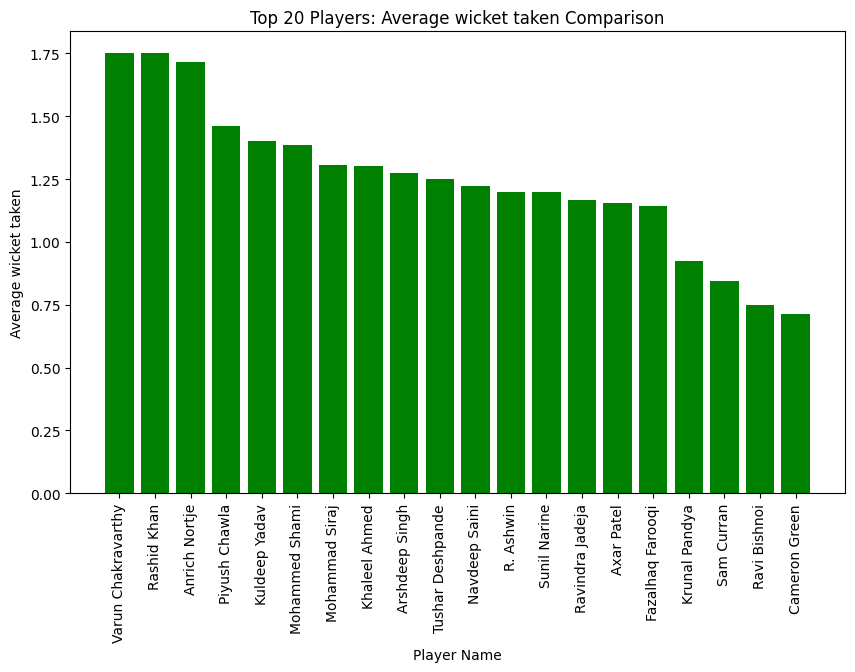

In [148]:
df_sorted4 = result_df4.sort_values(by='Average_wicket_taken',ascending=False).head(20)

colors = sns.color_palette("husl", n_colors=len(df_sorted))

plt.figure(figsize=(10, 6))
plt.bar(df_sorted4['Player_Name'], df_sorted4['Average_wicket_taken'], color='green')
plt.xlabel('Player Name')
plt.ylabel('Average wicket taken')
plt.title('Top 20 Players: Average wicket taken Comparison')
plt.xticks(rotation=90)
plt.show()

In [12]:
sql5 = """
select a.Player_ID,a.Player_Name,a.Batting_order,sum(b.Run_Scored)/count(b.Match_Num) as Batting_avg, 
(sum(b.Run_Scored)/sum(b.Balls_Faced))*100 as strike_rate, sum(b.Wickets_Taken)/count(b.Match_Num) as Average_wicket_taken
from Player_database.performances b 
left join Player_database.allrounder a
on b.Player_ID = a.Player_ID
where a.Player_ID is not null
group by 1,2
having count(match_num) >= 7 
order by 5 desc
limit 20;
"""

result_df5 = pd.read_sql_query(sql5, connection)
result_df5

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_32947/3662356123.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df5 = pd.read_sql_query(sql5, connection)


,Player_ID,Player_Name,Batting_order,Batting_avg,strike_rate,Average_wicket_taken
0,1057,Rashid Khan,Lower,11.8750,237.5000,1.7500
1,1190,Glenn Maxwell,Middle,28.5714,183.4862,0.1429
2,1126,Tim David,Middle,16.6154,166.1538,0.3846
3,1148,Shahrukh Khan,Middle,12.0000,165.9574,0.0769
4,1153,Liam Livingstone,Middle,31.0000,163.1579,0.3333
5,1058,Rahul Tewatia,Middle,9.3333,161.5385,0.0000
6,1059,Vijay Shankar,Middle,31.8889,161.2360,0.0000
7,1007,Shivam Dube,Middle,32.0833,160.4167,0.0000
8,1135,Cameron Green,Middle,27.2143,159.4142,0.7143
9,1107,Ayush Badoni,Middle,21.2000,147.2222,0.0000


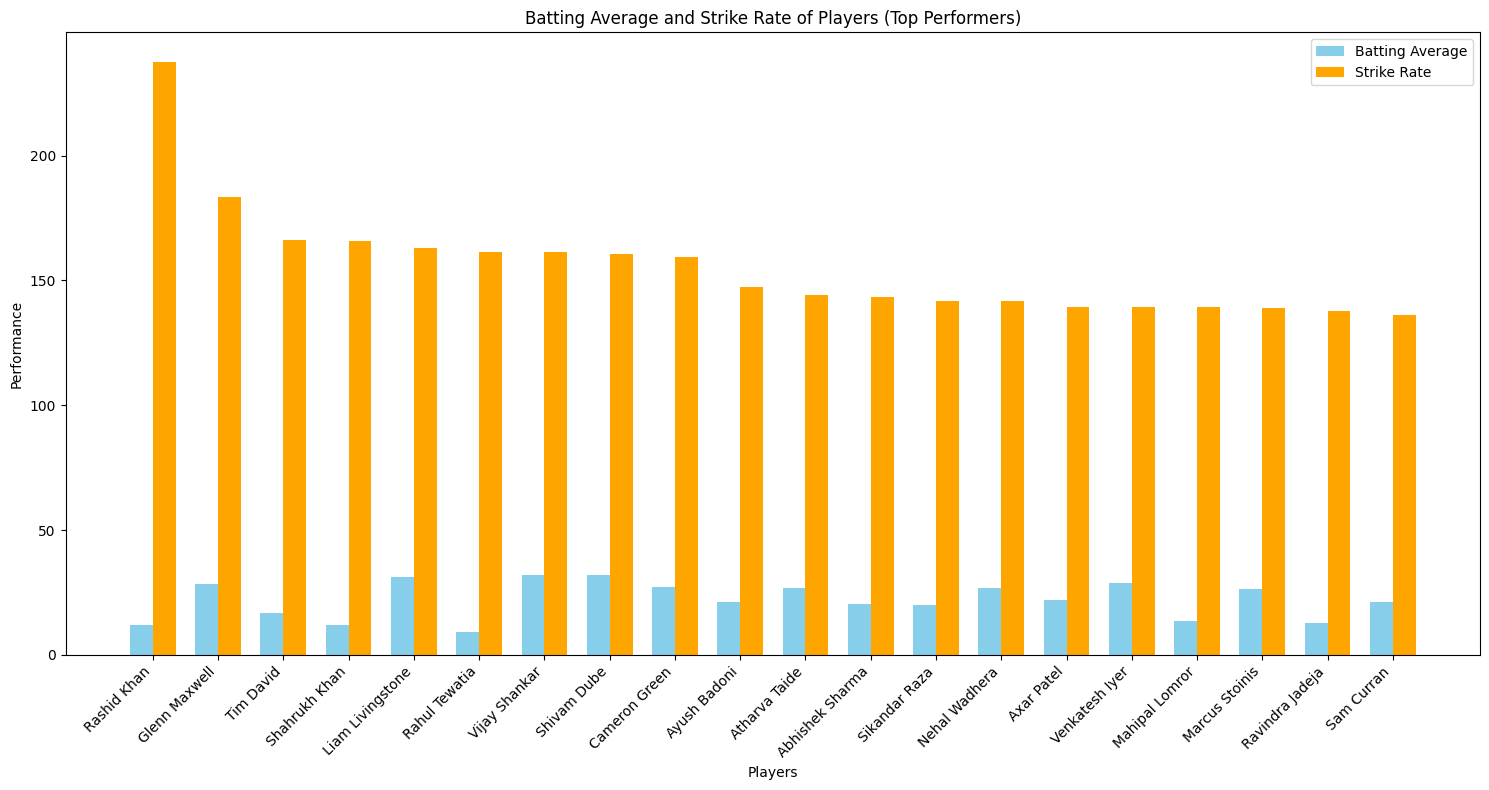

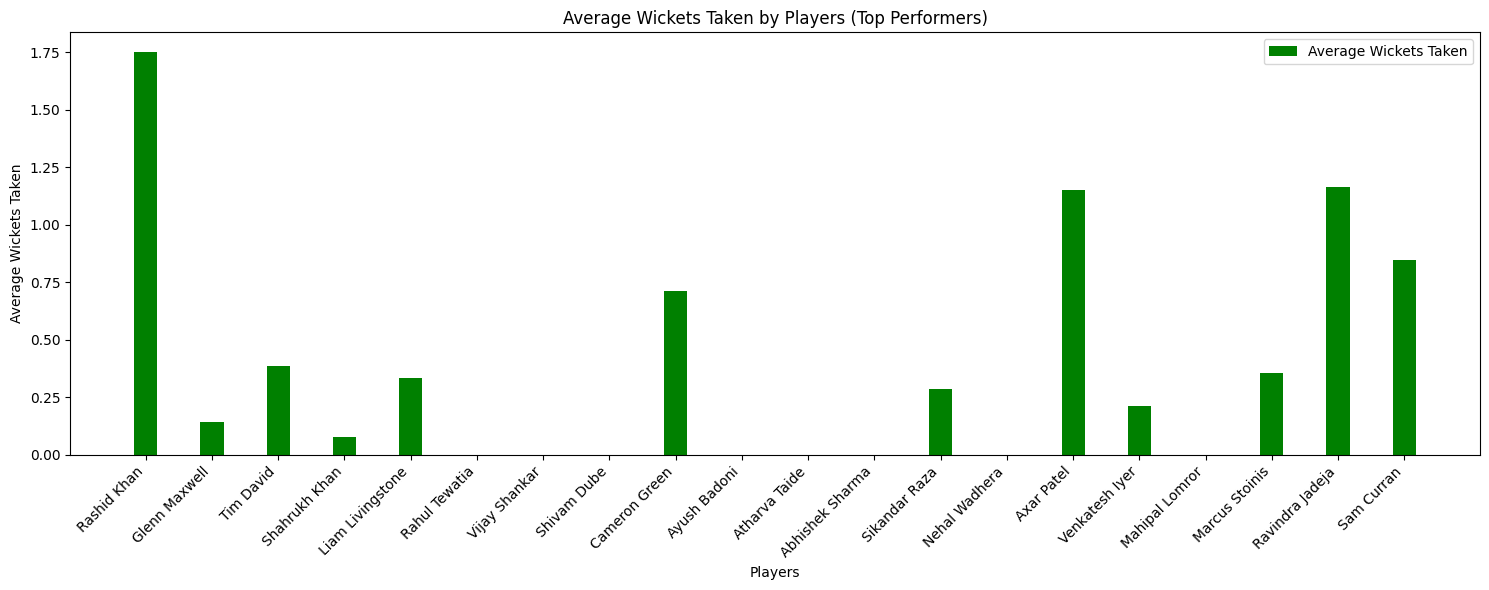

In [150]:
player_indices = np.arange(len(result_df5))

bar_width = 0.35

plt.figure(figsize=(15, 8))
bar1 = plt.bar(player_indices, result_df5['Batting_avg'], bar_width, label='Batting Average', color='skyblue')
bar2 = plt.bar(player_indices + bar_width, result_df5['strike_rate'], bar_width, label='Strike Rate', color='orange')

plt.xlabel('Players')
plt.ylabel('Performance')
plt.title('Batting Average and Strike Rate of Players (Top Performers)')
plt.xticks(player_indices + bar_width / 2, result_df5['Player_Name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
bar3 = plt.bar(player_indices, result_df5['Average_wicket_taken'], bar_width, label='Average Wickets Taken', color='green')

plt.xlabel('Players')
plt.ylabel('Average Wickets Taken')
plt.title('Average Wickets Taken by Players (Top Performers)')
plt.xticks(player_indices, result_df5['Player_Name'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [178]:
sql6 = """
select a.Player_ID,a.Player_Name, 
sum(b.balls_faced)/sum(b.no_of_boundaries) as Boundary_per_balls
from Player_database.performances b 
left join Player_database.batsmen a
on b.Player_ID = a.Player_ID
group by 1,2
having count(match_num) >= 7 
order by 3
limit 20
;"""

result_df6 = pd.read_sql_query(sql6, connection)
result_df6

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/3783727147.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df6 = pd.read_sql_query(sql6, connection)


,Player_ID,Player_Name,Boundary_per_balls
0,1093,Jason Roy,3.3958
1,1122,Suryakumar Yadav,3.4500
2,1167,Yashasvi Jaiswal,3.5046
3,1045,Phil Salt,3.9118
4,1110,Nicholas Pooran,4.0192
5,1150,Prabhsimran Singh,4.1228
6,1001,MS Dhoni,4.1538
7,1145,Shikhar Dhawan,4.2787
8,1108,Kyle Mayers,4.3860
9,1179,Dhruv Jurel,4.4000


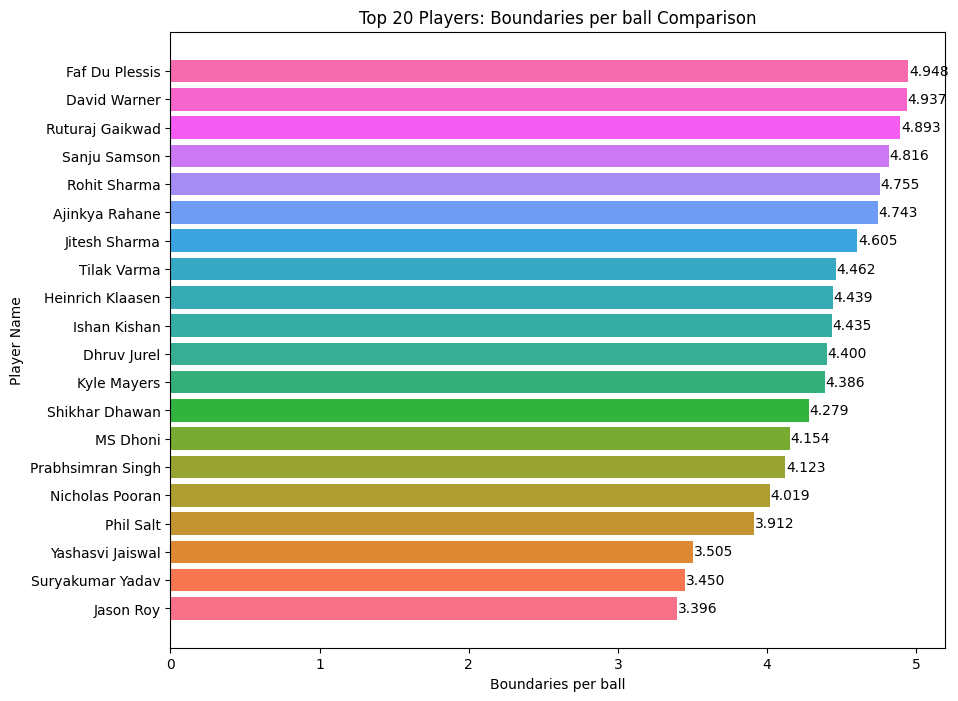

In [181]:
df_sorted6 = result_df6.sort_values(by='Boundary_per_balls', ascending=True).head(20)

colors = sns.color_palette("husl", n_colors=len(df_sorted6))

plt.figure(figsize=(10, 8))
bars = plt.barh(df_sorted6['Player_Name'], df_sorted6['Boundary_per_balls'], color=colors)

for bar, value in zip(bars, df_sorted6['Boundary_per_balls']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', va='center')

plt.xlabel('Boundaries per ball')
plt.ylabel('Player Name')
plt.title('Top 20 Players: Boundaries per ball Comparison')
plt.show()

In [187]:
sql7 = """
select a.Player_ID,a.Player_Name, 
count(b.MOM) as no_of_MOM
from Player_database.performances b 
left join Player_database.players a
on b.Player_ID = a.Player_ID
where MOM = "Yes"
group by 1,2
order by 3 desc
limit 20
;"""

result_df7 = pd.read_sql_query(sql7, connection)
result_df7

/var/folders/lq/5_d5pmdn13v1133cy87zmq1c0000gn/T/ipykernel_6831/2500749863.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df7 = pd.read_sql_query(sql7, connection)


,Player_ID,Player_Name,no_of_MOM
0,1167,Yashasvi Jaiswal,4
1,1051,Shubman Gill,3
2,1011,Ravindra Jadeja,3
3,1110,Nicholas Pooran,3
4,1057,Rashid Khan,2
5,1192,Faf Du Plessis,2
6,1081,Varun Chakravarthy,2
7,1083,Rinku Singh,2
8,1122,Suryakumar Yadav,2
9,1097,Marcus Stoinis,2


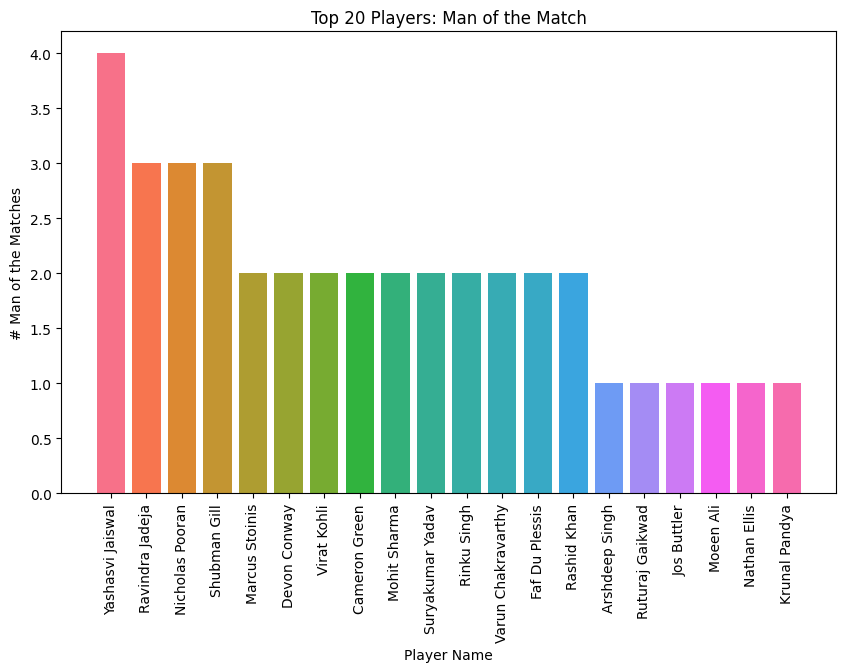

In [191]:
df_sorted7 = result_df7.sort_values(by='no_of_MOM',ascending=False).head(20)

colors = sns.color_palette("husl", n_colors=len(df_sorted))

plt.figure(figsize=(10, 6))
plt.bar(df_sorted7['Player_Name'], df_sorted7['no_of_MOM'], color=colors)
plt.xlabel('Player Name')
plt.ylabel('# Man of the Matches')
plt.title('Top 20 Players: Man of the Match')
plt.xticks(rotation=90)
plt.show()